In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from pyclustering.nnet.som import type_conn
from matrixprofile import matrixProfile, motifs
# local code
# import sys
# sys.path.insert(0, os.path.abspath('../src'))
import dtwsom

## 🎲 *Loading data*

In [2]:
D3011_data = np.load('dataset_TipAu_Au.npz')

In [3]:
D3011_data.keys()

KeysView(NpzFile 'dataset_TipAu_Au.npz' with keys: smoothedMeasuredHeight_m, vDeflection_N, height_m, measuredHeight_m, seriesTime_s...)

In [4]:
list(D3011_data.keys())

['smoothedMeasuredHeight_m',
 'vDeflection_N',
 'height_m',
 'measuredHeight_m',
 'seriesTime_s',
 'time_s']

In [5]:
force_data = D3011_data['vDeflection_N']

In [6]:
force_data.shape

(1024, 800)

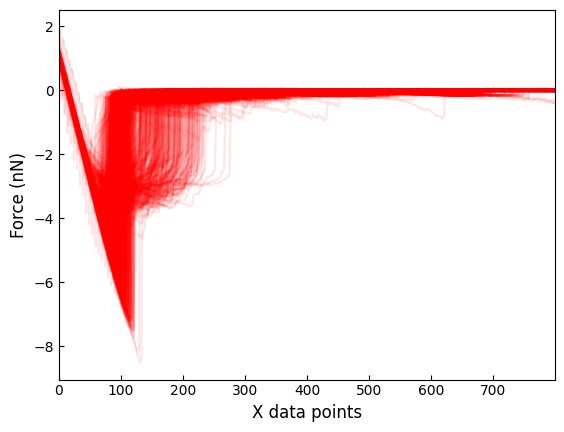

In [7]:
fig,ax = plt.subplots(dpi=100)

for curve in force_data:
    ax.plot(curve,c='red',alpha=0.1)

ax.set_xlabel('X data points',fontsize=12)
ax.set_ylabel('Force (nN)',fontsize=12)

ax.tick_params(labelsize=10,direction='in')

ax.set_xlim([0,force_data.shape[1]-1])

#fig.savefig('../data/figures/pca_examples/D3011_curves.png',dpi=300,bbox_inches='tight')

plt.show()

***

## ➗ *Split train and test*

In [8]:
train_data = force_data[:200]
test_data = force_data[200:]

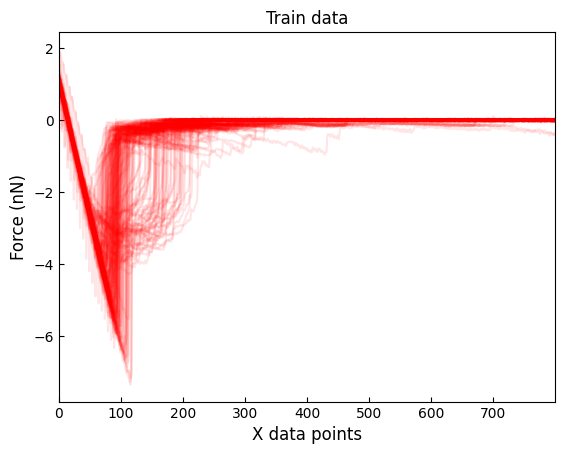

In [9]:
fig,ax = plt.subplots(dpi=100)

for curve in train_data:
    ax.plot(curve,c='red',alpha=0.1)

ax.set_xlabel('X data points',fontsize=12)
ax.set_ylabel('Force (nN)',fontsize=12)

ax.tick_params(labelsize=10,direction='in')

ax.set_title("Train data")

ax.set_xlim([0,train_data.shape[1]-1])

plt.show()

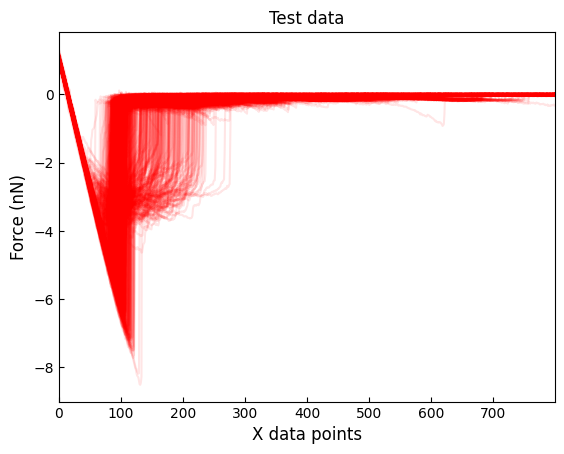

In [10]:
fig,ax = plt.subplots(dpi=100)

for curve in test_data:
    ax.plot(curve,c='red',alpha=0.1)

ax.set_xlabel('X data points',fontsize=12)
ax.set_ylabel('Force (nN)',fontsize=12)

ax.tick_params(labelsize=10,direction='in')

ax.set_title("Test data")

ax.set_xlim([0,test_data.shape[1]-1])

plt.show()

In [11]:
train_data = [serie[:350] for serie in train_data]

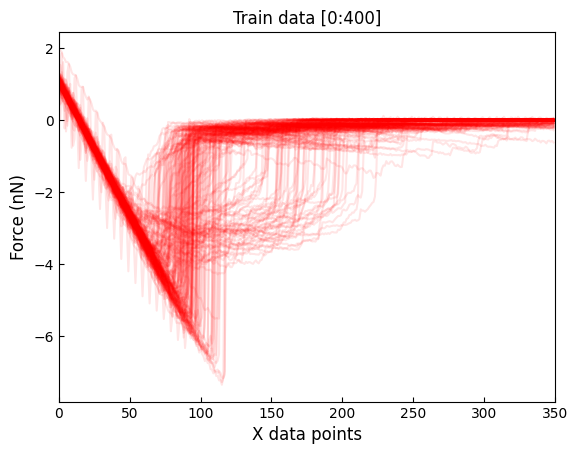

In [12]:
fig,ax = plt.subplots(dpi=100)

for curve in train_data:
    ax.plot(curve,c='red',alpha=0.1)

ax.set_xlabel('X data points',fontsize=12)
ax.set_ylabel('Force (nN)',fontsize=12)

ax.tick_params(labelsize=10,direction='in')

ax.set_title("Train data [0:400]")

ax.set_xlim([0,350])

plt.show()

***

## 🧬 *Motif discovery with matrix profile*

In [13]:
size = len(train_data[0]) # x data points
sample_size = len(train_data) # rows
print(size, sample_size)

350 200


In [14]:
joined_data = train_data[0]
for i in range(1, len(train_data)):
    joined_data = np.concatenate((joined_data, train_data[i]))
len(joined_data)

70000

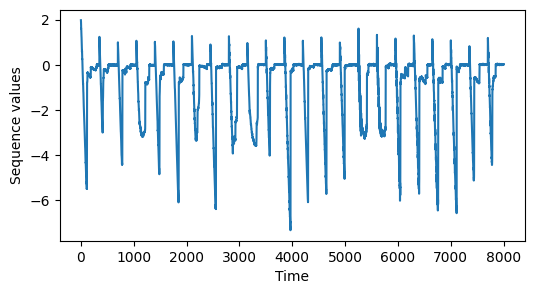

In [15]:
plt.figure(figsize=(6,3))
plt.plot(np.arange(8000), joined_data[:8000])
plt.ylabel("Sequence values")
plt.xlabel("Time")
plt.show()

In [16]:
%%time
mp = matrixProfile.stomp(joined_data, size)

CPU times: user 37 s, sys: 42.3 ms, total: 37.1 s
Wall time: 37 s


In [17]:
mp 

(array([4.01215661, 3.91068618, 3.80016961, ..., 1.29724572, 1.29590651,
        1.29478752]),
 array([62294., 62295., 63346., ..., 25198., 25199., 25200.]))

In [18]:
len(mp)

2

 Matrix Profile: 

In [19]:
mp[0]

array([4.01215661, 3.91068618, 3.80016961, ..., 1.29724572, 1.29590651,
       1.29478752])

In [20]:
len(mp[0])

69651

Index of Matrix Profile:

In [21]:
mp[1]

array([62294., 62295., 63346., ..., 25198., 25199., 25200.])

In [22]:
len(mp[1])

69651

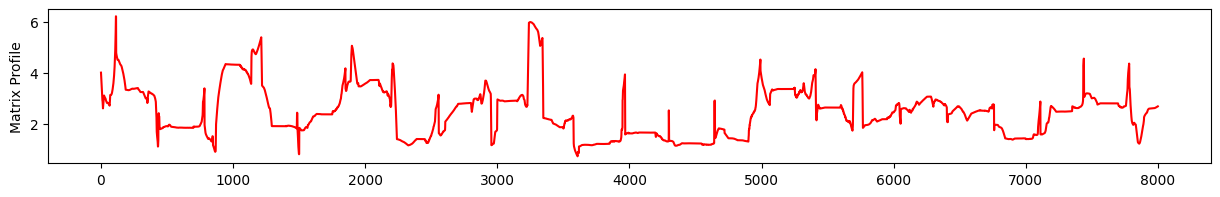

In [23]:
plt.figure(figsize=(15,2))
plt.plot(np.arange(8000), mp[0][:8000], color='red')
plt.ylabel("Matrix Profile")
plt.show()

In [24]:
%%time
mtfs, motif_d  = motifs.motifs(joined_data, mp, max_motifs=1000) # Computes the top k motifs from a matrix profile

CPU times: user 308 ms, sys: 3.8 ms, total: 312 ms
Wall time: 311 ms


mtfs = motifs (list of lists of indexes representing the motif starting locations)

In [25]:
print(mtfs) # Return the index of the main motif and its main neighbors
print()
print(len(mtfs))

[[3602, 10602, 45252, 47002, 62052, 63102, 64502, 66252, 67302, 68352], [1497, 11297, 12697, 18997, 37547], [13329, 23829, 69329], [45024, 68124], [37191, 64141], [18351, 27450, 34100, 40052, 46352, 48102], [13147, 23647, 35197, 69147], [865, 22215, 36915, 39015, 49865, 63515], [7068, 9168, 10917, 62366, 65166, 67613], [3842, 38139, 66493, 68593], [4468, 4812, 12165, 12515, 14614, 21615, 46111, 62565, 68866], [6410, 8860, 37910, 64859], [28096, 31947, 33347, 48747], [2422, 43028, 45470, 47228, 63324], [14340, 18537, 27636, 28685, 34286, 40238, 46538, 48288, 60183], [434, 29135, 30183, 32985, 35783, 43835, 58185], [64317, 66067], [7830, 11680, 20780, 21830, 25330, 41780, 44230, 51930, 56130, 59280], [2955, 24305], [4200, 12949, 17500, 32198, 45848, 48998], [25095, 25795, 27895, 31045, 46793, 67796, 69545], [10421, 67119], [5977, 35377, 57422], [15325, 17773, 18123, 19526, 29676], [26325, 55375, 56775], [15890, 52990], [9682, 19826, 33830, 34877, 47829, 54833], [17239, 21439, 41039], [31

motif_d = distances (list of minimum distances for each motif)

In [26]:
print(motif_d)
print()
print(len(motif_d))

[0.5963741354528347, 0.7030301314166405, 0.7551955592324884, 0.8199809492548361, 0.8306320708353342, 0.8661156104807468, 0.8763340133537276, 0.911723113411326, 0.9990232002177291, 1.0405398265722594, 1.0416339496414784, 1.058678895590473, 1.1073399290746275, 1.1088759060043032, 1.112084101837298, 1.1140307803358438, 1.1486098755583403, 1.1527465926173255, 1.1695369265043023, 1.1816561633087177, 1.2580595307646296, 1.3536154235563131, 1.3620018475236844, 1.377757101334466, 1.4143909020269174, 1.438698605232338, 1.4540374027879968, 1.4540683833335328, 1.4649625932326291, 1.4664207317236322, 1.511471006256301, 1.6104124456071427, 1.683152600541999, 1.7077194497685424, 1.7332081713330618, 1.757976501251915, 1.79778957769152, 1.8362997239060215, 1.8944454922381404, 1.9108271585199987, 1.9148586588758, 1.9360945615538192, 1.996007211082581, 2.0332363054015814, 2.0391344762158967, 2.045045872390558, 2.138841370300512, 2.148372601674126, 2.1643765567132953, 2.207157117282003, 2.215958050502436

In [27]:
motif_center_list = []
for motif in mtfs:
    center_pointers = list(np.arange(motif[0], motif[0]+size)) # Indexes of the central subsequence 
    # each center point start at the starting point of the significant motif (a time serie) and finish at the end of the serie
    motif_center_ts = joined_data[center_pointers] # use the indexes to extract the correspondent sequence in joined_data
    motif_center_list.append(motif_center_ts)

In [68]:
center_pointers

[14102,
 14103,
 14104,
 14105,
 14106,
 14107,
 14108,
 14109,
 14110,
 14111,
 14112,
 14113,
 14114,
 14115,
 14116,
 14117,
 14118,
 14119,
 14120,
 14121,
 14122,
 14123,
 14124,
 14125,
 14126,
 14127,
 14128,
 14129,
 14130,
 14131,
 14132,
 14133,
 14134,
 14135,
 14136,
 14137,
 14138,
 14139,
 14140,
 14141,
 14142,
 14143,
 14144,
 14145,
 14146,
 14147,
 14148,
 14149,
 14150,
 14151,
 14152,
 14153,
 14154,
 14155,
 14156,
 14157,
 14158,
 14159,
 14160,
 14161,
 14162,
 14163,
 14164,
 14165,
 14166,
 14167,
 14168,
 14169,
 14170,
 14171,
 14172,
 14173,
 14174,
 14175,
 14176,
 14177,
 14178,
 14179,
 14180,
 14181,
 14182,
 14183,
 14184,
 14185,
 14186,
 14187,
 14188,
 14189,
 14190,
 14191,
 14192,
 14193,
 14194,
 14195,
 14196,
 14197,
 14198,
 14199,
 14200,
 14201,
 14202,
 14203,
 14204,
 14205,
 14206,
 14207,
 14208,
 14209,
 14210,
 14211,
 14212,
 14213,
 14214,
 14215,
 14216,
 14217,
 14218,
 14219,
 14220,
 14221,
 14222,
 14223,
 14224,
 14225,
 14226,


In [28]:
len(motif_center_list) # 38 motifs!

78

***

## 🗺️ *SOM Training*

##### How the structure type affect the results? 

*Possibilities* ([Matrix Profile Github](https://github.com/target/matrixprofile-ts)):
1. grid_four ("Standard"): Grid type of connections when each oscillator has connections with left, upper, right, lower neighbors.
2. honeycomb: Grid type of connections when each oscillator has connections with left, upper-left, upper-right, right, right-lower, lower-left neighbors.
3. func_neighbor: Grid type of connections when existance of each connection is defined by the SOM rule on each step of simulation.
4. grid_eight: Grid type of connections when each oscillator has connections with left, upper-left, upper, upper-right, right, right-lower, lower, lower-left neighbors.


In [29]:
%time
rows = 3
cols = 3
structure = type_conn.grid_four # enumeration of connection types for SOM (inheritance of pyclustering)
network = dtwsom.DtwSom(rows, cols, structure)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs


In [30]:
%%time
network.train(motif_center_list, 50)

Epoch 1 achieved an average quantization error of 4.3221
Epoch 2 achieved an average quantization error of 4.7797
Epoch 3 achieved an average quantization error of 4.9472
Epoch 4 achieved an average quantization error of 5.2119
Epoch 5 achieved an average quantization error of 5.4247
Epoch 6 achieved an average quantization error of 5.5677
Epoch 7 achieved an average quantization error of 5.6727
Epoch 8 achieved an average quantization error of 5.6279
Epoch 9 achieved an average quantization error of 5.578
Epoch 10 achieved an average quantization error of 5.5814
Epoch 11 achieved an average quantization error of 5.5201
Epoch 12 achieved an average quantization error of 5.5143
Epoch 13 achieved an average quantization error of 5.4122
Epoch 14 achieved an average quantization error of 5.4752
Epoch 15 achieved an average quantization error of 5.4674
Epoch 16 achieved an average quantization error of 5.3941
Epoch 17 achieved an average quantization error of 5.5376
Epoch 18 achieved an ave

50

***

## *Analysis of the results*

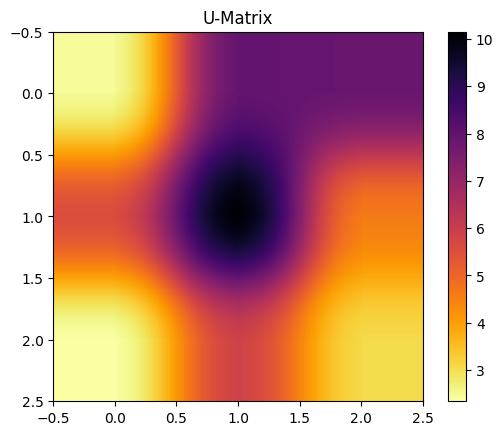

In [37]:
network.show_distance_matrix()

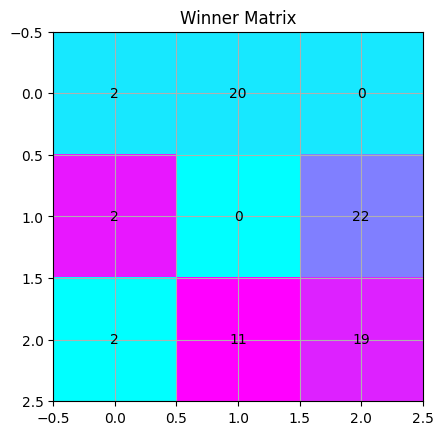

In [38]:
network.show_winner_matrix()

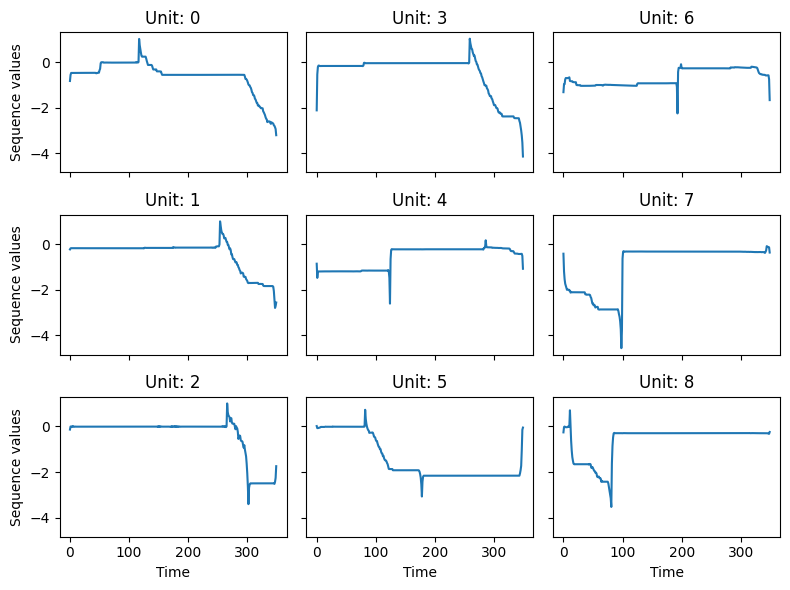

In [39]:
n_neurons = network._size
fig, axs = plt.subplots(3,3,figsize=(8, 6), sharex=True, sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/3) # round numbers down to the nearest integer:
    #math.ceil: round a number UP to the nearest integer
    row = neuron_index % 3
    neuron_weights = network._weights[neuron_index]
    axs[row, col].plot(np.arange(len(neuron_weights)), neuron_weights, label=str(neuron_index))
    axs[row, col].set_title("Unit: "+str(neuron_index))
    if col == 0:
        axs[row, col].set_ylabel("Sequence values")
    if row == 2:
        axs[row, col].set_xlabel("Time")
plt.tight_layout()
plt.show()

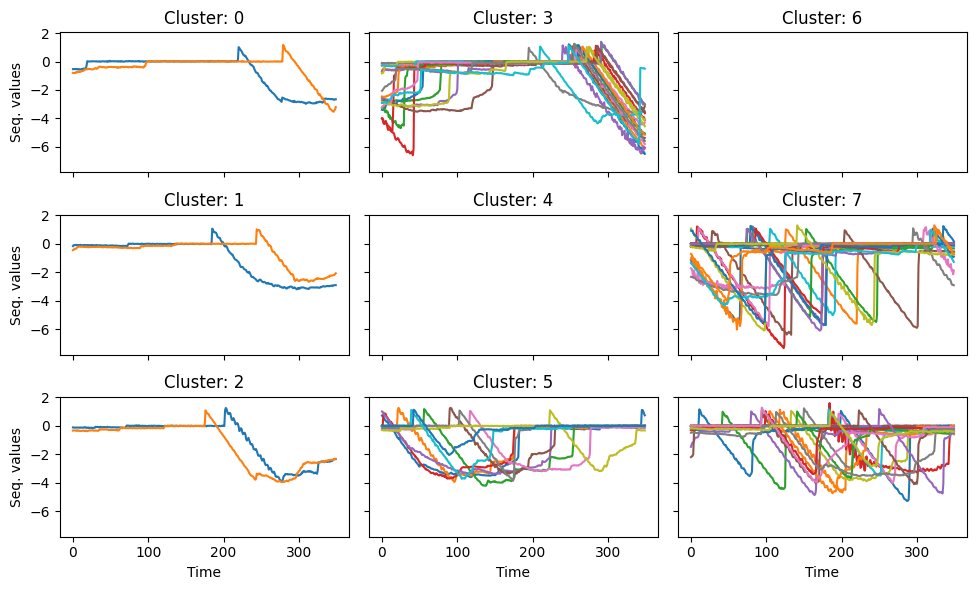

In [40]:
n = rows
n_neurons = network._size
fig, axs = plt.subplots(n,n,figsize=(10, 6), sharex=True, sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/n)
    row = neuron_index % n
    cluster_list = network.capture_objects[neuron_index]
    for member_index in cluster_list:
        axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
    axs[row, col].set_title("Cluster: "+str(neuron_index))
    if col == 0:
        axs[row, col].set_ylabel("Seq. values")
    if row == 2:
        axs[row, col].set_xlabel("Time")
plt.tight_layout()
plt.show()

### Cluster 3

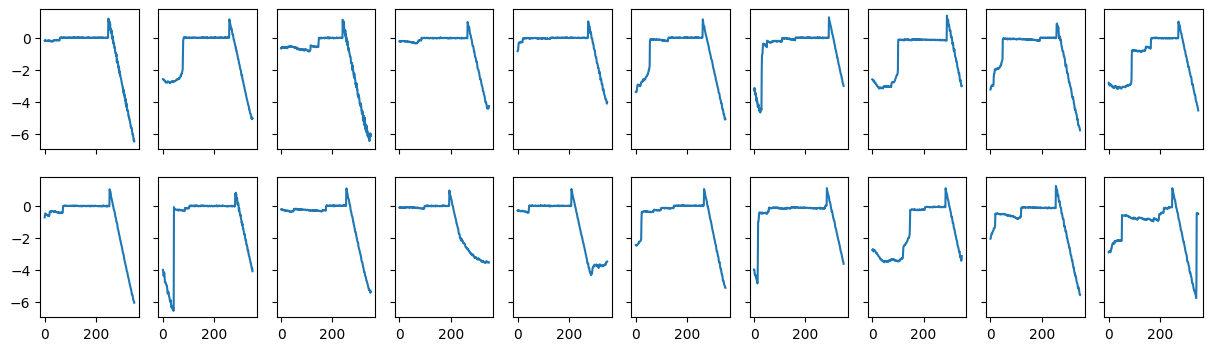

In [43]:
fig, axs = plt.subplots(2,10 ,figsize=(15, 4), sharex=True, sharey=True)
cluster_list = network.capture_objects[3]
for i, member_index in enumerate(cluster_list):
    col = math.floor(i/2)
    row = i % 2
    axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
plt.show()

### Cluster 5

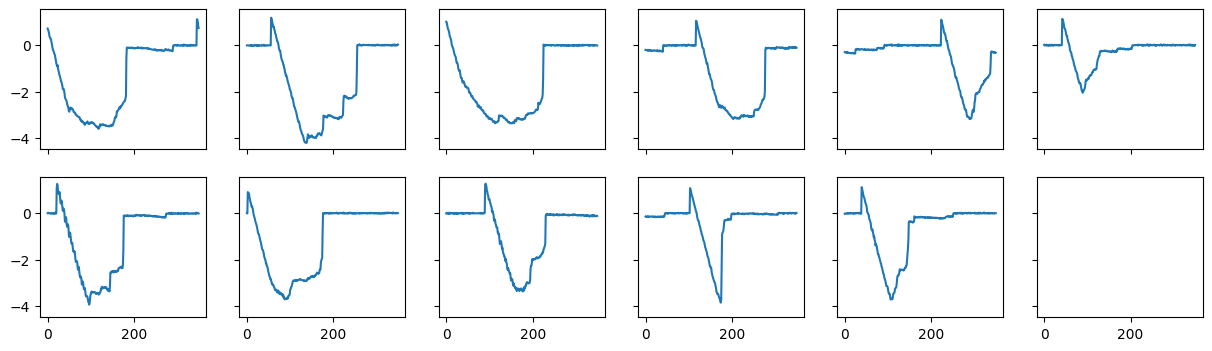

In [45]:
fig, axs = plt.subplots(2,6 ,figsize=(15, 4), sharex=True, sharey=True)
cluster_list = network.capture_objects[5]
for i, member_index in enumerate(cluster_list):
    col = math.floor(i/2)
    row = i % 2
    axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
plt.show()

### Cluster 7

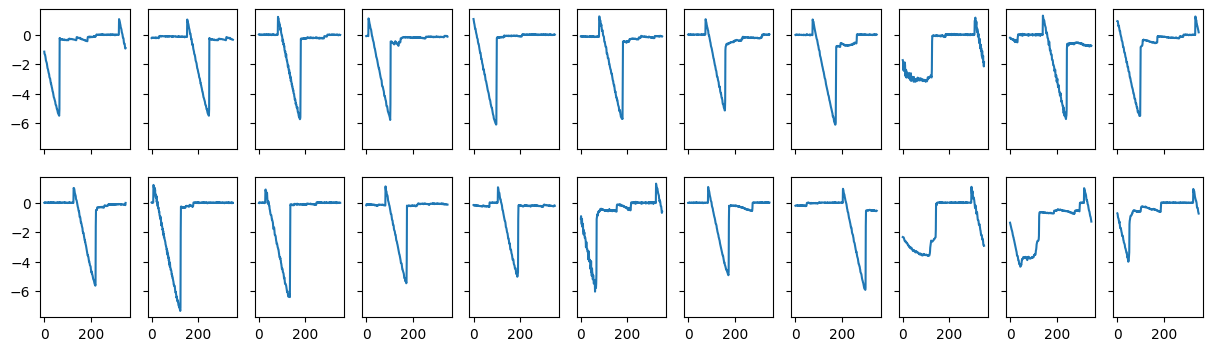

In [47]:
fig, axs = plt.subplots(2,11 ,figsize=(15, 4), sharex=True, sharey=True)
cluster_list = network.capture_objects[7]
for i, member_index in enumerate(cluster_list):
    col = math.floor(i/2)
    row = i % 2
    axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
plt.show()

### Cluster 8

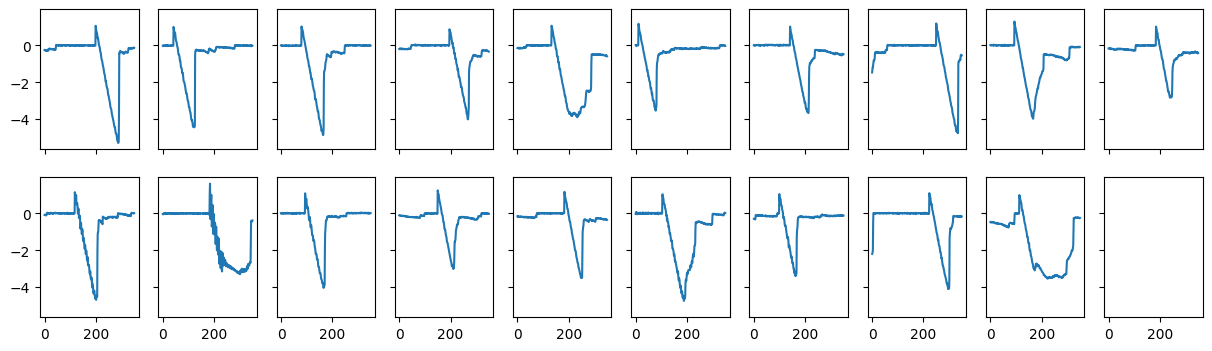

In [50]:
fig, axs = plt.subplots(2,10 ,figsize=(15, 4), sharex=True, sharey=True)
cluster_list = network.capture_objects[8]
for i, member_index in enumerate(cluster_list):
    col = math.floor(i/2)
    row = i % 2
    axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
plt.show()

In [52]:
help(network)

Help on DtwSom in module dtwsom object:

class DtwSom(pyclustering.nnet.som.som)
 |  DtwSom(rows, cols, conn_type=<type_conn.grid_eight: 1>, parameters=None, dtw_params=None)
 |  
 |  !
 |  @brief Represents self-organized feature map (SOM) with the Dynamic Time Warping (DTW) distance.
 |  @details The self-organizing feature map (SOM) method is a powerful tool for the visualization of
 |           of high-dimensional data. It converts complex, nonlinear statistical relationships between
 |           high-dimensional data into simple geometric relationships on a low-dimensional display.
 |           The DTW-SOM is then an adaptation of SOM for time-series subsequences with variable lengths
 |           which used the Dynamic Time Warping (DTW) distance as the similarity metric.
 |  
 |  Method resolution order:
 |      DtwSom
 |      pyclustering.nnet.som.som
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, rows, cols, conn_type=<type_conn.grid_eight: 1>, 

In [58]:
network.capture_objects

[[17, 39],
 [7, 52],
 [34, 54],
 [0, 1, 4, 8, 11, 12, 15, 18, 24, 25, 27, 31, 36, 37, 43, 48, 49, 67, 70, 77],
 [],
 [33, 51, 57, 58, 59, 62, 63, 65, 68, 72, 75],
 [],
 [2,
  3,
  6,
  9,
  10,
  13,
  14,
  16,
  19,
  20,
  21,
  22,
  23,
  28,
  29,
  30,
  32,
  42,
  45,
  50,
  64,
  76],
 [5, 26, 35, 38, 40, 41, 44, 46, 47, 53, 55, 56, 60, 61, 66, 69, 71, 73, 74]]

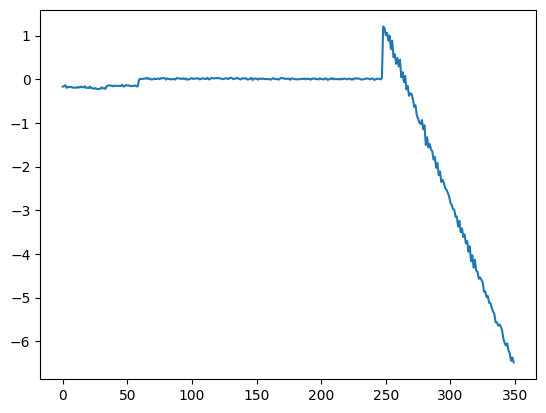

In [66]:
plt.plot(range(len(motif_center_list[0])), motif_center_list[0])